In [1]:
import os
import gc
from tqdm import tqdm
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

# %matplotlib widget
basePath = "./sims.TNG/TNG50-1/output"

Snapshot_Init = 71
Snapshot_End = 99
Lbsg_Indcies_Array = np.array(
    [117251, 300903, 324123, 329508, 382215,
        400973, 419618, 457431, 460722, 490814]
)

h = 0.6774  # km/Mpc

m_dm = 4.5e-5  # E10M_Sum
m_dm_h = m_dm * h

Critial_Density = 1.27e-8  # E10M_Sum/kpc^3
Critial_Density_h = Critial_Density / h**2  # E10M_Sum/(kpc/h)^3


In [3]:
Current_Snapshot = 99
Subhalo_Index = 329508


In [4]:
PartType4_Fields=['Coordinates','Masses','GFM_StellarFormationTime']
PartType4_Dict=il.snapshot.loadSubhalo(basePath,Current_Snapshot,Subhalo_Index,4,PartType4_Fields)


In [10]:
Subhalo_Dict=il.groupcat.loadSingle(basePath,Current_Snapshot,-1,Subhalo_Index)


In [19]:
PartType4_Dict['Distance']=np.linalg.norm(PartType4_Dict['Coordinates']-Subhalo_Dict['SubhaloPos'],axis=1)


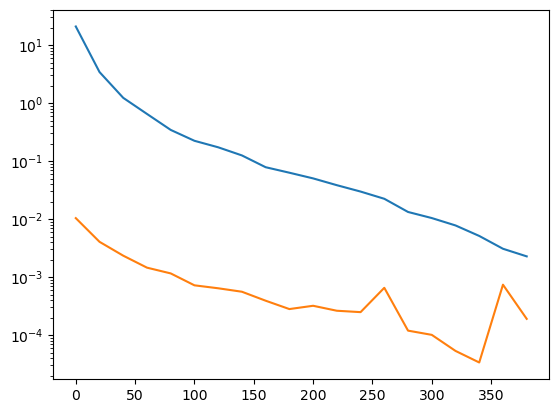

In [42]:
bins=20
condition1=PartType4_Dict['GFM_StellarFormationTime']>0.3
hist1,binrange1=np.histogram(PartType4_Dict['Distance'][np.where(condition1)[0]],range=([0,400]),bins=bins,weights=PartType4_Dict['Masses'][np.where(condition1)[0]])
plt.semilogy(binrange1[:bins],hist1)
condition2=PartType4_Dict['GFM_StellarFormationTime']<0.1
hist2,binrange2=np.histogram(PartType4_Dict['Distance'][np.where(condition2)[0]],range=([0,400]),bins=bins,weights=PartType4_Dict['Masses'][np.where(condition2)[0]])
plt.semilogy(binrange2[:bins],hist2)


In [37]:
hist


array([1.7174549e+01, 4.6473603e+00, 2.0077105e+00, 1.1200175e+00,
       6.1345339e-01, 4.4388846e-01, 3.1499350e-01, 2.1296278e-01,
       1.5547535e-01, 1.2852356e-01, 1.1289174e-01, 9.3248166e-02,
       8.0004014e-02, 6.0297258e-02, 4.6094581e-02, 3.8957000e-02,
       3.6423206e-02, 3.1078177e-02, 2.7486455e-02, 2.2984378e-02,
       1.9772826e-02, 1.7045561e-02, 1.5228243e-02, 1.1615944e-02,
       8.2655819e-03, 6.8329275e-03, 6.1988919e-03, 5.1791174e-03,
       4.3349937e-03, 3.4577579e-03, 2.5011334e-03, 1.9443110e-03,
       1.3085403e-03, 1.3274042e-03, 1.2340969e-03, 9.1574655e-04,
       7.2134886e-04, 6.0429861e-04, 4.3279692e-04, 2.8010728e-04,
       2.9301061e-04, 2.2151080e-04, 2.0854081e-04, 1.4350576e-04,
       5.7180270e-05, 5.6392302e-05, 5.3307624e-05, 1.8508355e-05,
       2.6797352e-06, 2.9281532e-06], dtype=float32)